<h1><div style="color:Sienna;font-family:serif;font-size:larger;text-align:center;border:solid,2px;padding:2%;">Méthode d'Euler - Equations différentielles d'ordre 1</div></h1>

<div style="color:chocolate;font-family:serif;border:solid,1px;padding:1%;"><b> Ce noteBook est interactif</b> : <br>
<ul>
    <li> Pour <b>exécuter le code</b>, cliquer dans le code (ne pas hésiter à le modifier) puis cliquer sur l'icône <img src="http://s15847115.domainepardefaut.fr/python/jupyterRun.png" alt="Bouton Run" style="display: inline;"> du bandeau ci-dessus.</li>
    <li> Pour <b>ajouter une ligne de code</b> sous une ligne, cliquer sur cette ligne puis cliquer sur l'icône <img src="http://s15847115.domainepardefaut.fr/python/jupyterPlus.png" alt="Bouton Plus" style="display: inline;">.</li>
    <li>Pour <b>ajouter une ligne de commentaires</b>, créer une ligne de code comme ci-dessus puis cliquer sur l'icône <img src="http://s15847115.domainepardefaut.fr/python/jupyterCode.png" alt="Bouton Code" style="display: inline;"> et choisir <img src="http://s15847115.domainepardefaut.fr/python/jupyterMarkdown.png" alt="Bouton Markdown" style="display: inline;">.</li>
</ul><br>Exécuter systématiquement le code fourni pour visualiser le résultat.<br>Les exercices sont signalés par l'icône &#128432;<br>Si le disque de l'icône <img src="http://s15847115.domainepardefaut.fr/python/jupyterKernel.png" alt="Bouton Markdown" style="display: inline;"> reste sombre, c'est que le programme tourne en boucle. Redémarrer alors le noyau Python (kernel)  en cliquant sur <img src="http://s15847115.domainepardefaut.fr/python/jupyterRestart.png" alt="Bouton Markdown" style="display: inline;">. La mémoire est remise à zéro, il faut donc exécuter à nouveau les commandes. Pour redémarrer et exécuter la feuille, choisir l'icône <img src="http://s15847115.domainepardefaut.fr/python/jupyterRExec.png" alt="Bouton Markdown" style="display: inline;"></div>

<h2><div style="color:blue;font-family:serif;border:solid,1px;padding:1%;">Méthode</div></h2>

<b>Notations</b><br>
Une équation différentielle linéaire du premier ordre peut se mettre sous la forme : $$\displaystyle\frac{dy}{dt}=f(t,y(t))$$ où la fonction $f(t,y(t))$ donnant l'expression de la dérivée est <b>connue</b>.<br><br>
<b>Exemple</b><br>
La tension <i>u</i> aux bornes du condensateur d'un circuit RC alimenté par un générateur délivrant une tension variable <i>e</i>(<i>t</i>) vérifie l'équation différentielle : $$\displaystyle\frac{du}{dt}+\frac{u}{\tau}=\frac{e(t)}{\tau}$$<br>
Dans cet exemple, l'équation différentelle s'écrit bien : $$\displaystyle\frac{du}{dt}=f(t,u(t))$$ avec  $f(t,u(t))=-\displaystyle\frac{u}{\tau}+\frac{e(t)}{\tau}$ où toutes les quantités sont connues car fixées dans le cadre de la modélisation.<br><br>

<b>Schéma numérique</b><br>
La méthode d’Euler consiste à :<br> 
1)	<span style="color:red;">discrétiser le temps <i>t</i></span> (remplacer la grandeur physique continue <i>t</i> par une suite d’instants tn) ;<br>
2)	<span style="color:red;">discrétiser la grandeur <i>y</i>(<i>t</i>)</span>  (remplacer la grandeur physique continue <i>y</i>(<i>t</i>) par une suite de valeurs yn correspondants aux différents instants tn) ;<br>
3)	<span style="color:red;">approximer la dérivée</span> $\dot{y}(t)$  par un <b>taux de variation</b> entre un instant et le suivant : $\dot y({t_n}) \approx \displaystyle\frac{y({t_{n+1}) - y({t_n})}}{t_{n+1} - t_n}$  (1);<br>
4)	<span style="color:red;">Exprimer $y(t_{n+1})$ en fonction de $y(t_n)$</span> (cf. relation de récurrence ci-dessous).<br><br>

<b>Implémentation</b> (i.e. représentation informatique) :<br>
- les instants tn seront stockés dans une liste t ou un tableau numpy ;<br>
- les valeurs yn seront stockées dans une liste y ou un tableau numpy ;<br>
<span style="color:red;">A la notation mathématique tn correspondra donc la notation informatique t&#91;n&#93; et à y(tn) correspondra la notation y&#91;n&#93;</span>.

<b>1/ Discrétisation du temps <i>t</i></b><br>
On se donne la durée entre deux instants consécutifs, notée <i>h</i> et appelée <b>pas de discrétisation</b>, choisie suffisamment « petite » (compromis entre temps de calcul et précision souhaitée).<br>
On définit alors des instants successifs par :  t0 ,  t1 = t0 + h, t2 = t1 + h,… séparés par une même durée h. On a donc $t\left[n+1\right] = t\left[n\right] + h.$<br>
Ou encore  $t\left[n\right] = t0 + n*h$.<br>
On dispose donc de deux façons de calculer les instants tn.<br>

<b>2/ 3/ et 4/ Discrétisation de <i>y</i>(<i>t</i>)</b><br>
En remplaçant $t_{n+1} - t_n$ par <i>h</i> dans (1), on obtient : $y(t_{n + 1}) = y(t_n) + h\,f({t_n},y(t_n))$<br>
La récurrence informatique s’écrit alors : $y\left[n+1\right] = y\left[n\right] + h*f(t\left[n\right],y\left[n\right])$<br>
<span style="color:red;">Cette relation constitue la récurrence permettant de calculer le point suivant à partir du point précédent (la condition initiale fournit le point de départ)</span>.<br><br>
Dans l'exemple du circuit RC, la récurrence s'écrit : $u\left[n+1\right] = u\left[n\right] +h*\left(-u\left[n\right]/tau + e\left[n\right]/tau \right)$.


<h2><div style="color:blue;font-family:serif;border:solid,1px;padding:1%;">Méthode d'Euler avec des listes</div></h2>

On souhaite résoudre l’équation différentielle $\displaystyle\frac{du}{dt} + \frac{1}{\tau }u = 0$  de la décharge d’un condensateur de capacité C à travers un résistor de résistance R sachant que la tension aux bornes du condensateur à t = t0 = 0 est u0 = 10 V et que $\tau$ = 1 ms.<br>
La durée totale de la simulation est notée T et le nombre de points calculés est noté N.<br><br>
Deux métodes sont suggérées ci-dessous car <span style="color:red;">la façon d’initialiser les listes conditionne l’écriture de la récurrence</span>.<br><br>
Les scripts proposés ci-dessous peuvent être améliorés, ils sont adaptés à la découverte de l'algorithme d'Euler...

&#128432; <b>1ère méthode - Listes initialisées grâce aux valeurs initiales &rArr; nouvelles valeurs ajoutées à la liste au fur et à mesure</b><br>
Écrire une fonction Euler1(t0, u0, T, N) de paramètres t0, u0, T, N définis ci-dessus et retournant deux listes nommées t et u contenant les instants et les valeurs correspondantes de la tension aux bornes du condensateur ($\tau$ pourra être considérée comme une variable globale) :<br>
- initialiser les listes à l’aide des conditions initiales fournies ;<br>
- utiliser une boucle pour remplir les listes t et u à l'aide de la méthode append().<br>


In [15]:
def Euler1(t0,u0,T,N):
    global tau               # tau sera défini en dehors de la fonction
    t = [t0]                 # Initialisation de la liste des instants
    u = [u0]                 # Initialisation de la liste des tensions
    h = T/N                  # Pas temporel
    for n in range(N):       # Boucle calculant N points (donc listes de N+1 valeurs au total)
        t.append(t[n]+h)          # Calcul puis ajout de l'instant suivant à la liste t
        u.append(u[n]-h*u[n]/tau) # Calcul puis ajout de la tension correspondante à la liste u
    return t, u              # La fonction retourne les deux listes

&#128432; <b>2ème méthode - Listes initialisées à leur taille finale puis modifiées</b><br>
Écrire une fonction Euler2(to, uo, T, N) effectuant le même travail que Euler1 en procédant comme suit :
- initialiser t par compréhension ;<br>
- initialiser u par une liste remplie de 0 puis modifier u pour tenir compte des conditions initiales ;<br>
- utiliser une boucle pour modifier la liste u en écrasant les valeurs préexistantes.<br>


In [16]:
def Euler2(t0,u0,T,N):
    global tau
    h = T/N
    t = [t0+n*h for n in range(N+1)]  # Initialisation par compréhension (N+1 valeurs)
    u = (N+1)*[u0]                    # Initialisation de la liste des tensions (N+1 valeurs)
    for n in range(N):                # Boucle modifiant les N derniers points de la liste u
        u[n+1] = u[n]-h*u[n]/tau           # Récurrence
    return t, u

L’intérêt de cette <b>dernière méthode</b> réside dans le fait que <span style="color:red;">la relation de récurrence peut être programmée sans aucune modification</span>.<br> Dans la fonction Euler1, u&#91;n+1&#93; = … est <b>impossible</b> car u&#91;n+1&#93; <b>ne préexiste pas</b>.

<b>Tracés</b>

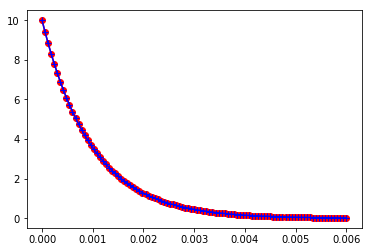

In [19]:
import matplotlib.pyplot as plt

# Paramètres physiques
t0, u0, T, tau = 0, 10, 6E-3, 1E-3

# Paramètres schéma numérique
N = 100

# Calculs
t1, u1 = Euler1(t0,u0,T,N)
t2, u2 = Euler2(t0,u0,T,N)

# Tracés
plt.plot(t1,u1,color='red',  marker='o')
plt.plot(t2,u2,color='blue', marker='+')
plt.show()

🖰 Superposer à ces simulations la solution exacte (calculée) en définissant une fonction solution(t) dont le graphe sera superposé à ceux des deux simulations précédentes.

<h2><div style="color:blue;font-family:serif;border:solid,1px;padding:1%;">Méthode d'Euler avec des tableaux</div></h2>

A suivre...